# Plot the Galactic plane in az/el from a given location on a given date
#### 1/7/22 jpw
#### uses https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from datetime import datetime
%matplotlib inline

### Enter your observing location here

In [7]:
# enter your observing location and time difference relative to UT here
# west longitudes are negative
here = EarthLocation(lat=21.3036944*u.deg, lon=-157.8116667*u.deg, height=372*u.m)
utcoffset = -10*u.hour  # relative to Universal Time (= GMT)

### Set the local time and date here

In [3]:
local_time = '2022-01-07 11:00'
local_time = ''

# but if you don't set it, e.g. local_time='', then use the time when you run the program
if len(local_time) == 0:
    local_time = datetime.now()

savefig = True
fileout = 'Galaxy_AzEl_'+str(local_time).replace(' ','_').replace(':','')[:15]+'.png'

In [4]:
t = Time(local_time, scale='utc') - utcoffset
l = np.arange(-180,181,5)
nl = l.size
alt = np.zeros(nl)
az =  np.zeros(nl)
for i in range(nl):
    c = SkyCoord(l[i], 0, frame='galactic', unit='deg')
    altaz = c.transform_to(AltAz(obstime=t, location=here))
    #print(f"Alt/Az = {altaz.alt:.2}, {altaz.az:.2}")
    alt[i] = altaz.alt / u.deg
    az[i]  = altaz.az / u.deg

In [5]:
altaz_sun = get_sun(t).transform_to(AltAz(obstime=t, location=here))

Plot saved to  Galaxy_AzEl_2022-01-21_1413.png


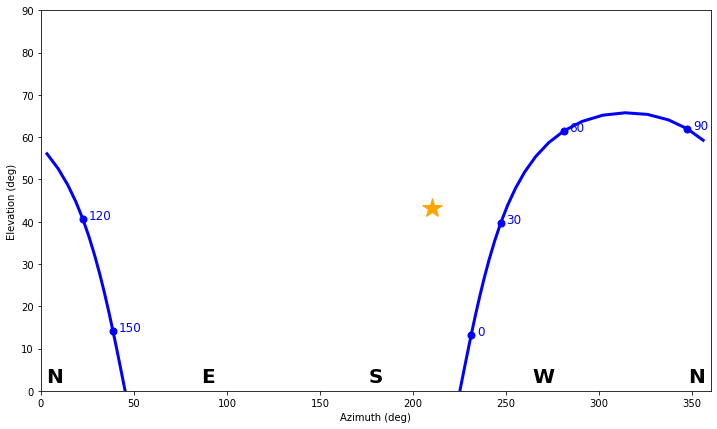

In [6]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

# sort in azimuth to stop wrap around
k = np.argsort(az)
ax.plot(az[k], alt[k], 'b-', lw=3)
ax.plot(altaz_sun.az/u.deg, altaz_sun.alt/u.deg, color='orange', marker='*', ms=20)
ax.set_xlim(0, 360)
ax.set_ylim(0, 90)
ax.set_xlabel('Azimuth (deg)')
ax.set_ylabel('Elevation (deg)')

ax.text(  3, 2, 'N', fontsize=20, fontweight='bold', ha='left')
ax.text( 90, 2, 'E', fontsize=20, fontweight='bold', ha='center')
ax.text(180, 2, 'S', fontsize=20, fontweight='bold', ha='center')
ax.text(270, 2, 'W', fontsize=20, fontweight='bold', ha='center')
ax.text(357, 2, 'N', fontsize=20, fontweight='bold', ha='right')

# plot tick marks to show longitude
lmarker = np.arange(-180,180,30)
for l1 in lmarker:
    i = np.argwhere(np.abs(l-l1)<1)[0][0]
    ax.plot(az[i], alt[i], 'bo', ms=7)
    ax.text(az[i]+3, alt[i], str(l1), fontsize=12, color='blue', clip_on=True)

if savefig:
    plt.savefig(fileout)
    print('Plot saved to ',fileout)